TP 2: ARITMETICA DE PIXELES

In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

C:\Users\admin\AppData\Local\Temp\ipykernel_6080\246411929.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image1 = imageio.imread(r'espacio.jpg')


(360, 540, 3) uint8


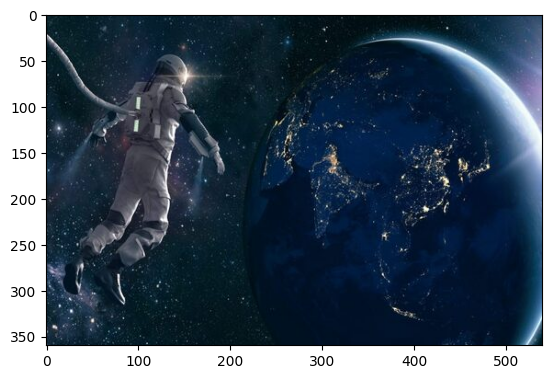

C:\Users\admin\AppData\Local\Temp\ipykernel_6080\246411929.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image2 = imageio.imread(r'partenon.jpg')


(360, 540, 3) uint8


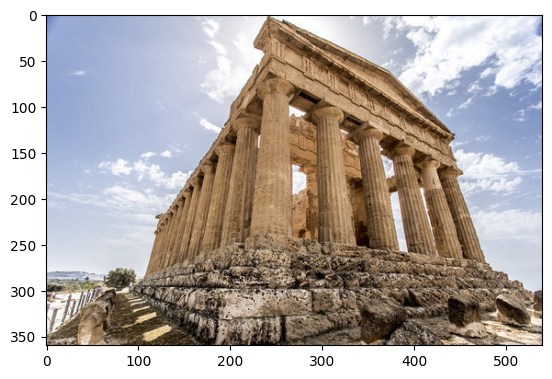

In [18]:
#load an image from the repository (so we can compare our programs in the class)
image1 = imageio.imread(r'espacio.jpg')
print(image1.shape,image1.dtype)
plt.imshow(image1)
plt.show()

image2 = imageio.imread(r'partenon.jpg')
print(image2.shape,image2.dtype)
plt.imshow(image2)
plt.show()

1- Cuasi suma y resta (clampeada y promediada) en el espacio de color RGB

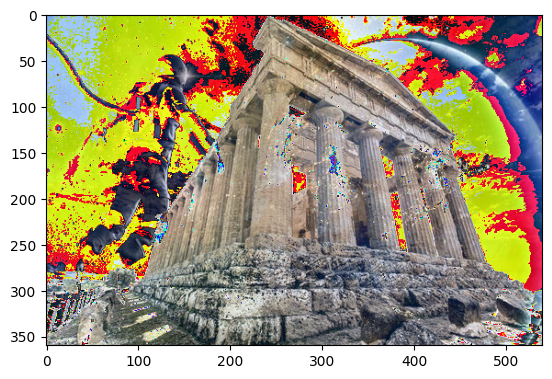

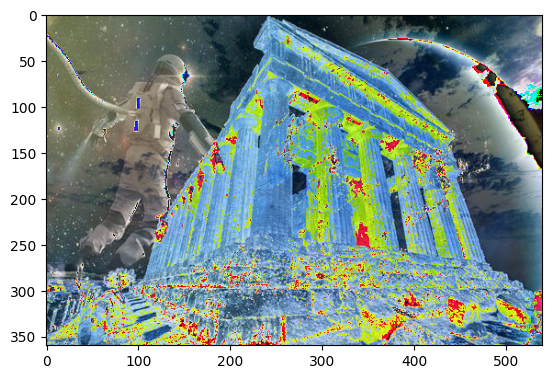

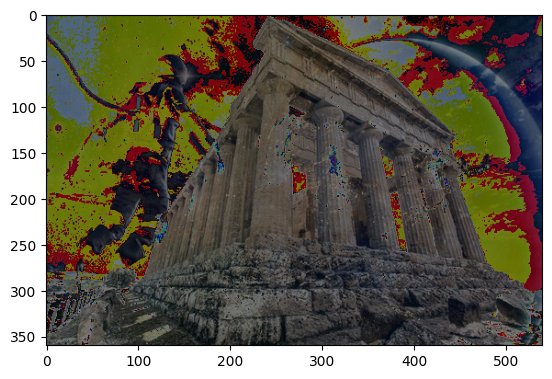

In [19]:
cuasiSuma = np.clip(image1 + image2, 0, 255).astype(np.uint8)
plt.imshow(cuasiSuma)
plt.show()

cuasiResta = np.clip(image1 - image2, 0, 255).astype(np.uint8)
plt.imshow(cuasiResta)
plt.show()

promedio = np.clip((image1 + image2)/2, 0, 255).astype(np.uint8)
plt.imshow(promedio)
plt.show()

2- Ídem punto 1 en el espacio de color YIQ

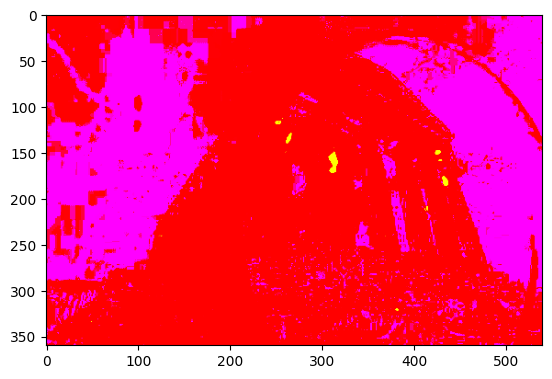

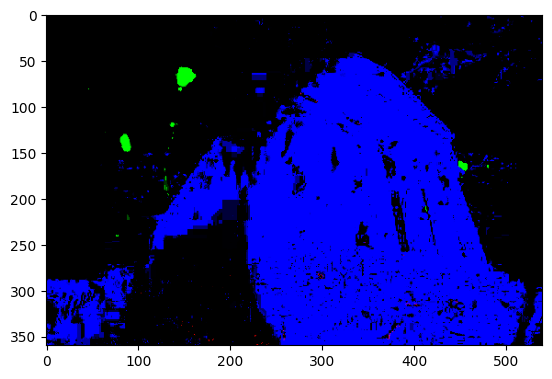

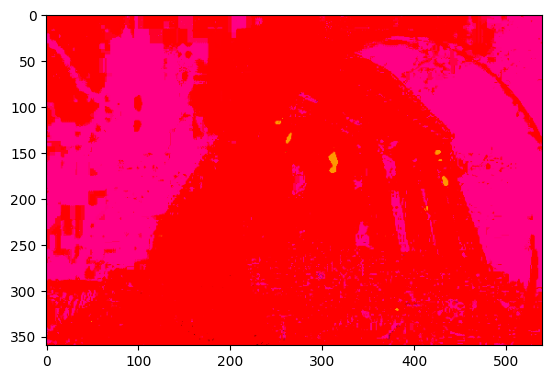

In [24]:
#2.RGB -> YIQ (utilizando la segunda matriz)
def rgb_to_yiq(im):
    yiq=np.zeros(im.shape)
    yiq[:,:,0] = np.clip(0.299 * im[:,:,0] + 0.587 * im[:,:,1] + 0.114 * im[:,:,2], 0, 1)
    yiq[:,:,1] = np.clip(0.595716 * im[:,:,0] - 0.274453 * im[:,:,1] - 0.321263 * im[:,:,2], -0.5957, 0.5957)
    yiq[:,:,2] = np.clip(0.211456 * im[:,:,0] - 0.522591 * im[:,:,1] + 0.311135 * im[:,:,2], -0.5226, 0.5226)
    return yiq

yiq1 = rgb_to_yiq(image1)
yiq2 = rgb_to_yiq(image2)

cuasiSumayiq = np.clip(yiq1 + yiq2, 0, 1)
plt.imshow(cuasiSumayiq)
plt.show()

cuasiRestayiq = np.clip(yiq1 - yiq2, 0, 1)
plt.imshow(cuasiRestayiq)
plt.show()

promedioyiq = np.clip((yiq1 + yiq2)/2, 0, 1)
plt.imshow(promedioyiq)
plt.show()

3- Producto y cociente de dos imágenes

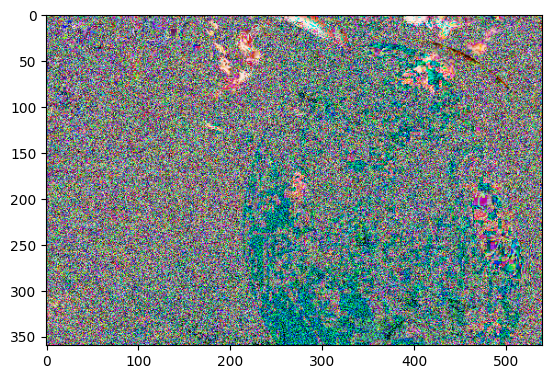

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


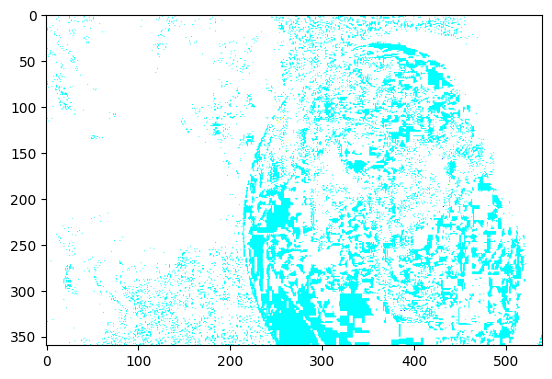

In [26]:
producto = np.clip((image1 * image2) / 255, 0, 255)
plt.imshow(producto)
plt.show()

cociente = np.clip(image1 / (image2 + 1e-5) * 255, 0, 255)
plt.imshow(cociente)
plt.show()

4- Resta de dos imágenes implementando el valor absoluto

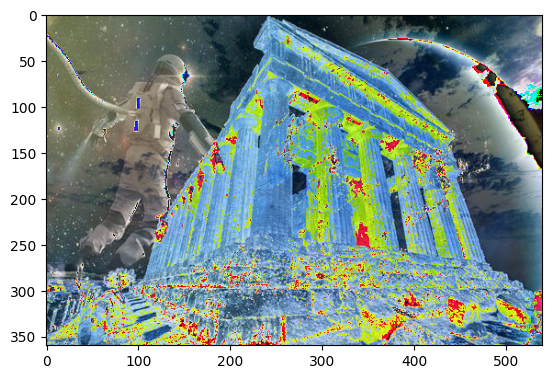

In [27]:
restaAbsoluta = np.clip(np.abs(image1 - image2), 0, 255).astype(np.uint8)
plt.imshow(restaAbsoluta )
plt.show()

5- ‘If- darker ’e ‘ If ligther’

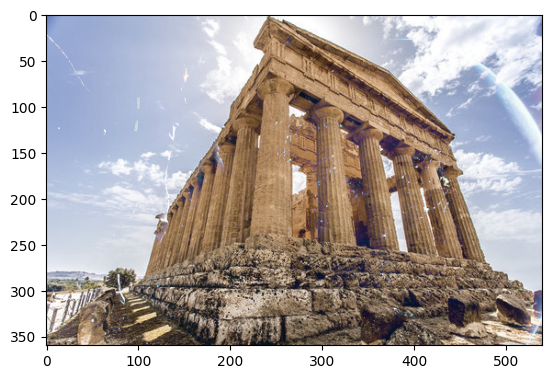

In [28]:
# If darker: Si el píxel de image1 es más oscuro, se mantiene; sino, se usa el de image2
darker_img = np.where(image1 < image2, image1, image2)

# If lighter: Si el píxel de image1 es más claro, se mantiene; sino, se usa el de image2
lighter_img = np.where(image1 > image2, image1, image2)

plt.imshow(darker_img)
plt.imshow(lighter_img)
#show_images([darker_img, lighter_img], ['If Darker', 'If Lighter'])